<a href="https://colab.research.google.com/github/HarmonyKM/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [2]:
df =pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**1. How many rows and columns?**

In [3]:
#1. To find how many rows and columns, & 2.What are the datatypes 
df.info()

#Output tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**2. What are the datatypes of each Variable**

*from the output above we have:*

- 4 columns with the datatype float64
- 1 column with the datatype int64
- 7 columns with the datatype object

**3. Are there duplicates? if so, drop any duplicates**

In [4]:
#Check for duplicates
df.duplicated().sum()

0

**4. Identify missing values**

In [5]:
#Check for missing values
df.isna().sum()

#Output revealed Item Weight & Outlet Size have missing Values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values, and do it &** 
*6. Confirm that there are no missing values after addressing them*

In [6]:
#I will replace the the missing values with the average of the Item_Weights column
weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna('weight_mean', inplace=True)

#Verify change for Item_Weight column was succesful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df['Item_Weight'].describe()
#We have an error in the column

count            8523
unique            416
top       weight_mean
freq             1463
Name: Item_Weight, dtype: object

In [15]:
# Replace the incorrect value in Item Weight and try again to change the type
df['Item_Weight'] = df['Item_Weight'].replace('weight_mean', 12.857645184135976)
df['Item_Weight'] = df['Item_Weight'].astype(float)
df.info()

#Error has been fixed, with the Item Weight now returnins as a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#The Outlet_Size measures the size of the store in terms of area covered and this is vital data should they expand. I will not drop but i will fill with "Missing"
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verify change for Outlet_Size column was succesful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistencies**

In [8]:
df.head(40)

#Output reveals the data in the Item_Fat_Content is inconsistent

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,weight_mean,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [9]:
#Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
#Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
#Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [12]:
#Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8. For any numerical columns, obtain the summary statistics of each**

In [13]:
#To show summary statistics for each column, limiting to 2 decimal places
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


## **Part 3**

- **Histogram, Boxplot & Heatmap**

**Histograms**

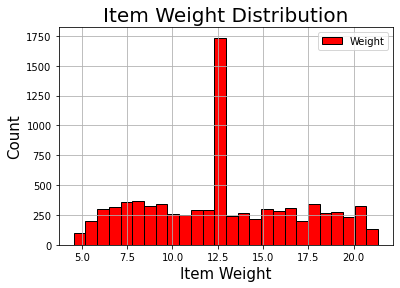

In [16]:
df['Item_Weight'].hist(bins = 'auto', color = 'red', edgecolor = 'black', label = 'Weight');
plt.title('Item Weight Distribution', fontsize = 20)
plt.xlabel('Item Weight', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.legend();

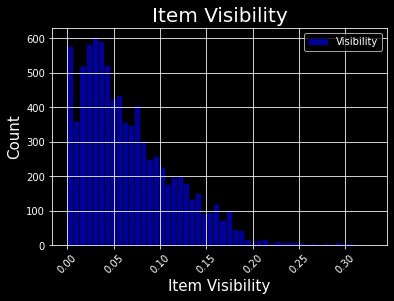

In [17]:
plt.style.use('dark_background')
df['Item_Visibility'].hist(color = 'blue',
                     bins = 'auto',
                     edgecolor = 'black',
                     label = 'Visibility',
                     alpha = 0.6);                           
plt.title('Item Visibility', fontsize = 20);
plt.xlabel('Item Visibility', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(rotation = 45);
plt.legend();

**Boxplot**

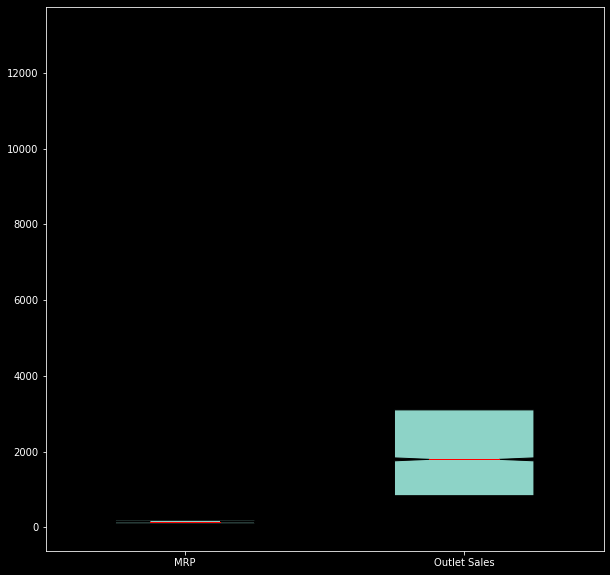

In [18]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));

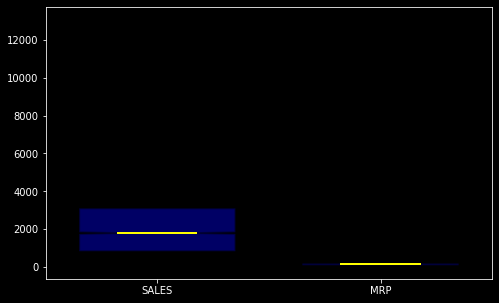

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
MRP = df['Item_MRP']
SALES = df['Item_Outlet_Sales']
boxplots = axes.boxplot([SALES, MRP],
                        notch = True,
                        labels = ['SALES', 'MRP'],
                        widths = .7,
                        patch_artist = True,
                        medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle= '--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));

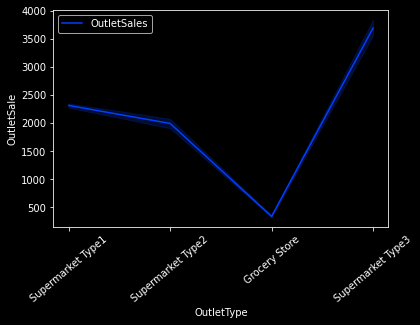

In [20]:
from traitlets.traitlets import Type
plt.style.use('seaborn-bright')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales');
plt.xlabel('OutletType');
plt.ylabel('OutletSale');
plt.xticks(rotation=40);
plt.legend();

**Heatmaps**

- *Correaltion between features*

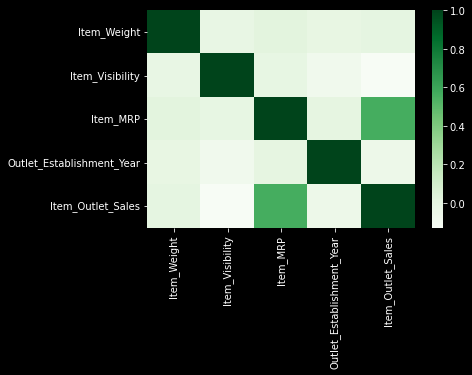

In [21]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens');

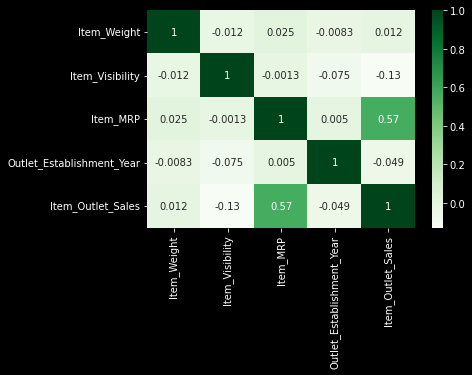

In [22]:
sns.heatmap(corr, cmap = 'Greens', annot = True);